In [1]:
import sklearn.datasets

In [2]:
import numpy as np
import pandas as pd


In [3]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [4]:
X=breast_cancer.data

In [5]:
Y=breast_cancer.target

In [6]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [7]:
data['class']=breast_cancer.target

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [72]:
class Perceptron:
       
    def __init__(self):
        self.w=None
        self.b=None
        
    def model(self,x):
        return 1 if (np.dot(self.w,x) >= self.b) else 0
    
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self,X,Y,epochs=1,lr=1):
        
        self.w=np.ones(X.shape[1])  #for all the columns
        self.b=0
        
        accuracy={}
        max_accuracy=0
        
        for i in range(epochs):
        
            for x,y in zip(X,Y):
                y_pred=self.model(x)           
                if y==1 and y_pred ==0:
                    self.w=self.w+lr*x
                    self.b=self.b+lr*1
                elif y==0 and y_pred == 1:
                    self.w=self.w-lr*x
                    self.b=self.b-lr*1
            accuracy[i]=accuracy_score(self.predict(X),Y)
            if(accuracy[i]>max_accuracy):
                max_accuracy=accuracy[i]
                chkptw=self.w
                chkptb=self.b
                
        self.w=chkptw
        self.b=chkptb
        print(max_accuracy)
        
        plt.plot(accuracy.values())
        plt.ylim([0,1])
        plt.show()
        

In [73]:
perceptron=Perceptron()

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y) 

In [12]:
X=data.drop('class',axis=1)
Y=data['class']

In [14]:
X_train=X_train.values
X_test=X_test.values

0.916015625


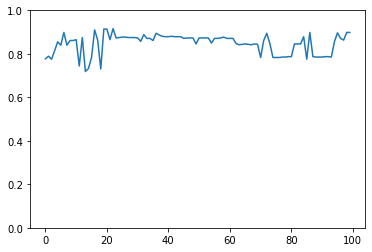

In [74]:
perceptron.fit(X_train,Y_train,100,0.0001)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

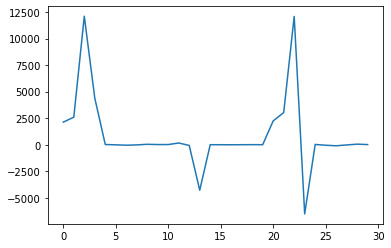

In [62]:
plt.plot(perceptron.w)
plt.show()

In [63]:
from sklearn.metrics import accuracy_score

In [36]:
Y_pred_train=perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.814453125


In [37]:
Y_pred_test=perceptron.predict(X_test)
print(accuracy_score(Y_pred_test,Y_test))

0.8245614035087719
